# Capstone Project: [testfit.io](https://blog.testfit.io/)
## Wrangle

In [39]:
import numpy as np
import pandas as pd

import re

from datetime import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import wrangle as wr

import warnings
warnings.filterwarnings("ignore")

In [48]:
pd.set_option("display.max_columns", None)
plt.rc("figure", figsize=(16, 8))

## Stakeholder Notes
- Work with Commitments
- Activity Descriptions == New Construction, SubRehab, Additions, and Improvements
- Loan amount >= $1M:
    - Mortgage at time of Firm Commitment Issuance, Amendment or Reissuance?
    - Mortgage at Firm Commitment Issuance?
    - Final Mortgage Amount? **Probably this one...**
- Market == Large urban centers; meaning **cities** not just states; not rural one-off projects
- Types of FHA loan is irrelevant

In [ ]:
# commitments
# df  = pd.read_excel("Initi_Endores_Firm Comm_DB_FY06_FY20_Q2.xlsx", sheet_name="Firm Cmtmts, Iss'd and Reiss'd", header=6)
# print(df.shape)
# df.head()
df = pd.read_csv("hud_commitments.csv", index_col=0)
print(df.shape)
df.head()

In [ ]:
# df["Activity Description"].value_counts()

In [ ]:
# df.to_csv("hud_commitments.csv")

In [ ]:
# df.rename(columns={"Activity Group": "activity_group"}, inplace=True)

In [ ]:
# activity_groups filtered for groups of interest for clifton
# df = df[(df.activity_group == "NC/SR") | (df.activity_group == "Imp/Adds")]

In [ ]:
# only including loans greater than or equal to $1M
# df = df[df["Final Mortgage Amount"] >= 1000000]
# df.head()

In [ ]:
df.info()

In [ ]:
# df["Activity Description"].value_counts()

In [ ]:
# df["activity_group"].value_counts()

In [ ]:
df.rename(columns={"Facility Type": "facility_type"}, inplace=True)

In [ ]:
df.facility_type.value_counts()

In [ ]:
df.rename(columns={"FHA Number": "fha_number"}, inplace=True)

In [ ]:
df.groupby(["Project State"]).fha_number.count().sort_values().plot.barh()
plt.show()

In [ ]:
# df[df["Final Mortgage Amount"] >= 1000000].shape

In [ ]:
df.rename(columns={"Final Mortgage Amount": "final_mortgage"}, inplace=True)

In [ ]:
df.groupby(["Project State"]).final_mortgage.sum().sort_values().plot.barh()

In [ ]:
df["Project City"].value_counts().head(20)

In [ ]:
df.groupby(["Project City", "Fiscal Year of Firm Commitment"]).size().sort_values()

In [ ]:
df.groupby(["Project City", "Fiscal Year of Firm Commitment"])["final_mortgage"].sum().sort_values()

In [ ]:
df[df["Project City"] == "Austin"].groupby("Fiscal Year of Firm Commitment")["final_mortgage"].sum()

In [ ]:
df[df["Project City"] == "Minneapolis"].groupby("Fiscal Year of Firm Commitment")["final_mortgage"].sum()

In [ ]:
# csv works and can be read
df = pd.read_csv("hud_commitments.csv", index_col=0)
df.head()

In [ ]:
df[df["Project City"] == "Austin"].groupby("Fiscal Year of Firm Commitment")["Final Mortgage Amount"].sum()

In [ ]:
df[df["Project City"] == "Austin"].groupby("Fiscal Year of Firm Commitment")["Final Mortgage Amount"].count()

In [ ]:
df[df["Project City"] == "Austin"].groupby("Fiscal Year of Firm Commitment")["Final Mortgage Amount"].size()

In [ ]:
df.shape

In [ ]:
# let's see the number of unique values for earch column
# for col in df.columns:
#     unique = len(df[col].unique())
#     if unique > 10:
#         print()
#         print(f'{col} has {unique} values')
#     else:
#         print()
#         print(f'{col} value count:')
#         print(df[col].value_counts())

There are hospitals in this data.

In [ ]:
df.columns

In [ ]:
df.head()

In [ ]:
df.dtypes

In [ ]:
# df["Date of Firm Issue"] = pd.to_datetime(df["Date of Firm Issue"])
# df["Date of Firm Issue"].dt.year

---
## Wrangle

In [3]:
df = wr.wrangle_hud()
print(df.shape)
df.head()

(20917, 29)


,fha_number,project_name,project_city,project_state,basic_fha_risk_share_or_other,program_category,activity_description,activity_group,facility_type,program_designation,firm_commitment_activity,lender_at_firm_commitment_activity,mortgage_at_time_of_firm_commitment_issuance_amendment_or_reissuance,unit_or_bed_count,date_of_firm_commitment_activity,fiscal_year_of_firm_commitment_activity,mortgage_at_firm_commitment_issuance,date_of_firm_issue,fiscal_year_of_firm_commitment,map_or_tap,lihtc_designation,tax_exempt_bond_designation,home_designation,cdbg_designation,section_202_refi_designation,irp_decoupling_designation,hope_vi_designation,current_status,final_mortgage_amount
0,11345004,Western Heights Apartments,Olney,TX,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/236,Firm Issued,GREYSTONE SERVICING COMPANY LLC,277600,48,2005-10-01,2006,277600,2005-10-01,2006,TAP,False,False,False,False,False,False,False,Firm Comit then Owner Withdrew,271700
1,11345005,Woodlands Village Apts,Breckenridge,TX,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/236,Firm Issued,GREYSTONE SERVICING COMPANY LLC,173000,88,2005-10-01,2006,173000,2005-10-01,2006,TAP,False,False,False,False,False,False,False,Finally Endorsed,168300
2,4235583,Harbor Court Apartments,Rocky River,OH,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,Firm Issued,GREYSTONE SERVICING COMPANY LLC,3886800,120,2005-10-03,2006,3886800,2005-10-03,2006,TAP,False,False,False,False,False,False,False,Finally Endorsed,3886800
3,3297260,Compton Towne Apartments,Wilmington,DE,Risk Sharing,QPE Risk Sharing,Refinance,Refi/ Pchse,Coop/Apts/Mobile Home Pk/ALF,QPE Risk Shg Existing,Firm Issued,FEDERAL NATIONAL MORTGAGE,4000000,76,2005-10-03,2006,4000000,2005-10-03,2006,TAP,True,False,False,False,False,False,False,Finally Endorsed,4000000
4,7135779,Evergreen Terrace I,Joliet,IL,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,Firm Issued,REILLY MORTGAGE GRP,5129000,241,2005-10-04,2006,5129000,2005-10-04,2006,TAP,False,False,False,False,False,False,False,Firm Expired,5247700


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20917 entries, 0 to 20917
Data columns (total 29 columns):
 #   Column                                                                Non-Null Count  Dtype         
---  ------                                                                --------------  -----         
 0   fha_number                                                            20917 non-null  object        
 1   project_name                                                          20917 non-null  object        
 2   project_city                                                          20917 non-null  object        
 3   project_state                                                         20917 non-null  object        
 4   basic_fha_risk_share_or_other                                         20917 non-null  object        
 5   program_category                                                      20917 non-null  object        
 6   activity_description                  

---
## Explore
### What are the characteristics of loan practices in Houston (2009), Seattle (2010), and Dallas (2012)?
- Do these markets follow a similar trajectory in the years leading up the boom?

In [5]:
# fmt-clipboard function from terminal == black formatting
# df[df.project_city == "Houston"].groupby(["date_of_firm_commitment_activity"])[
#     "final_mortgage_amount"
# ].sum().reset_index().sort_values(by="date_of_firm_commitment_activity")

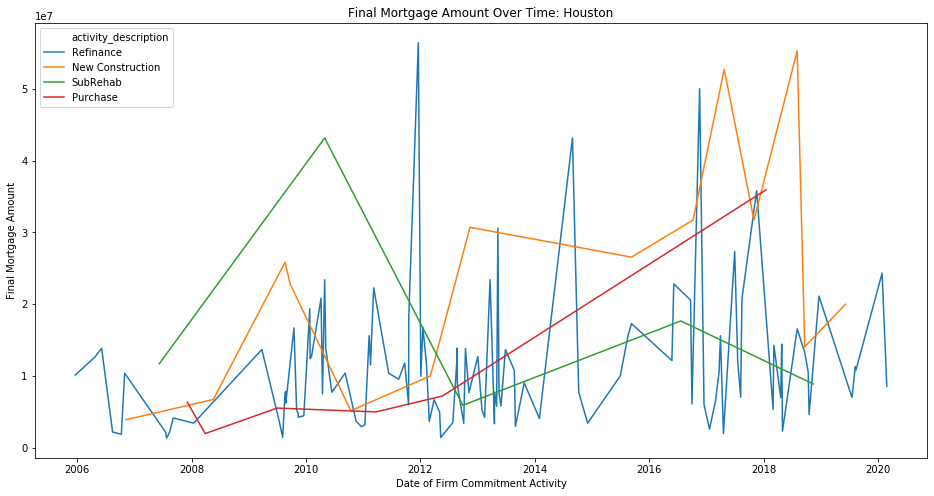

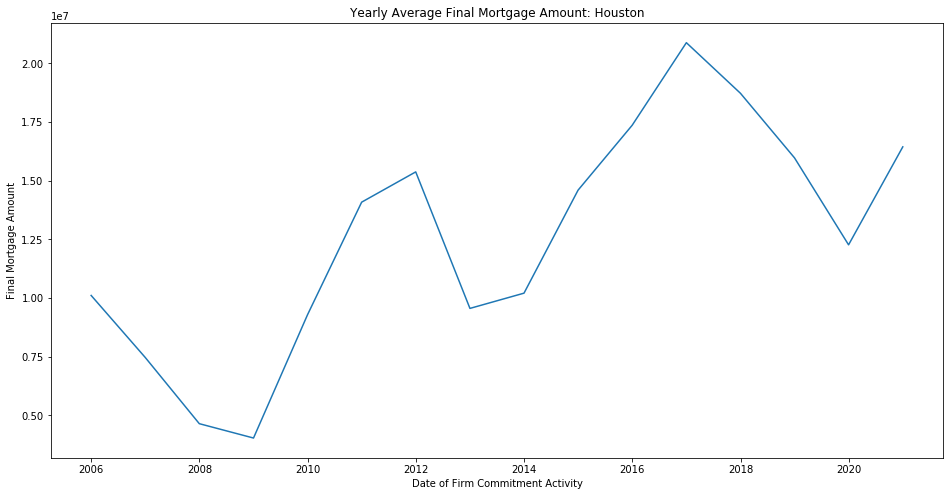

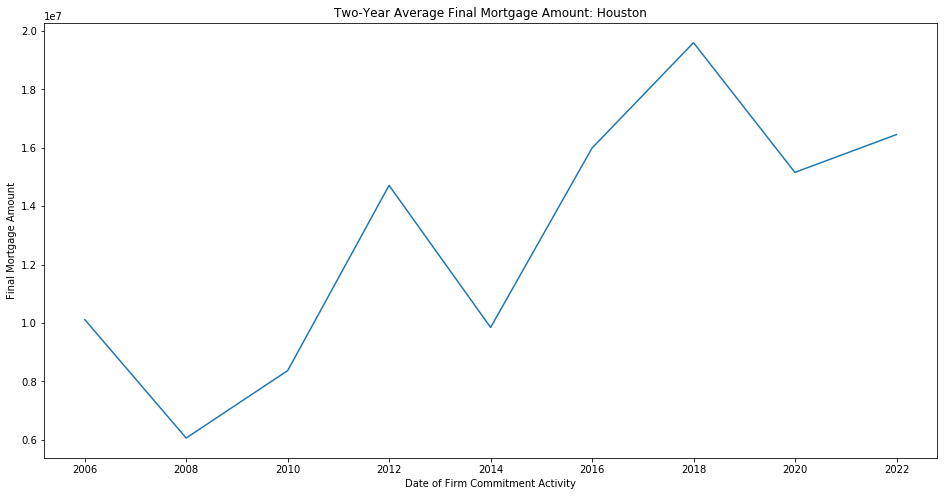

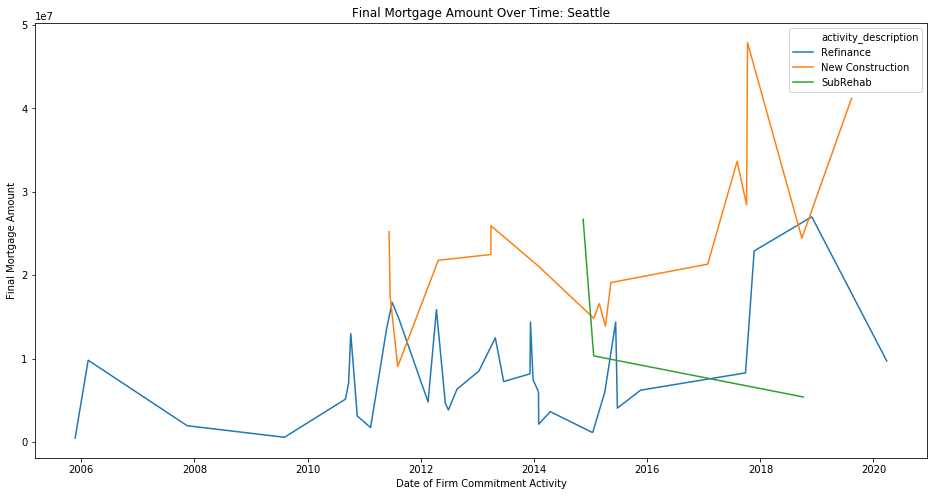

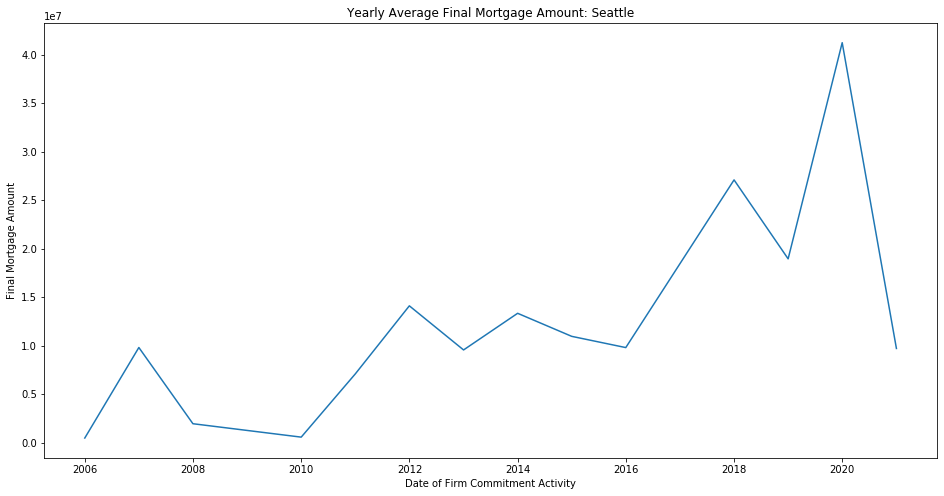

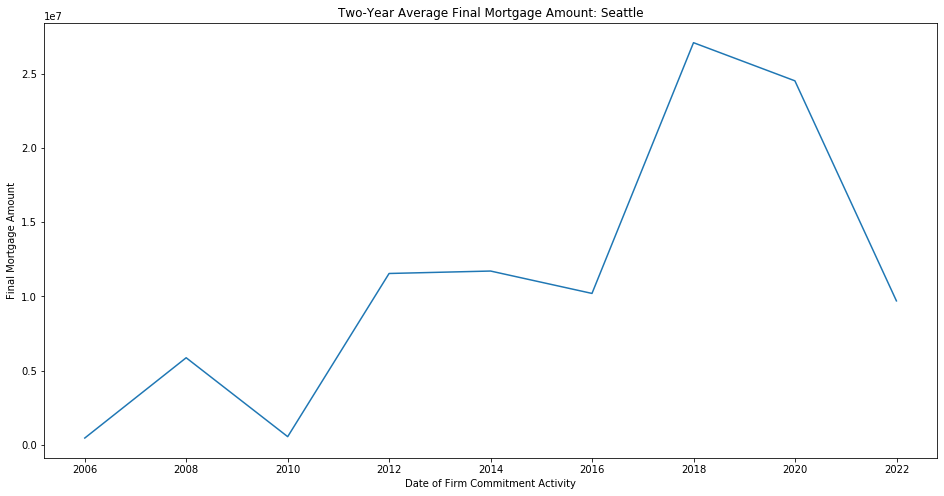

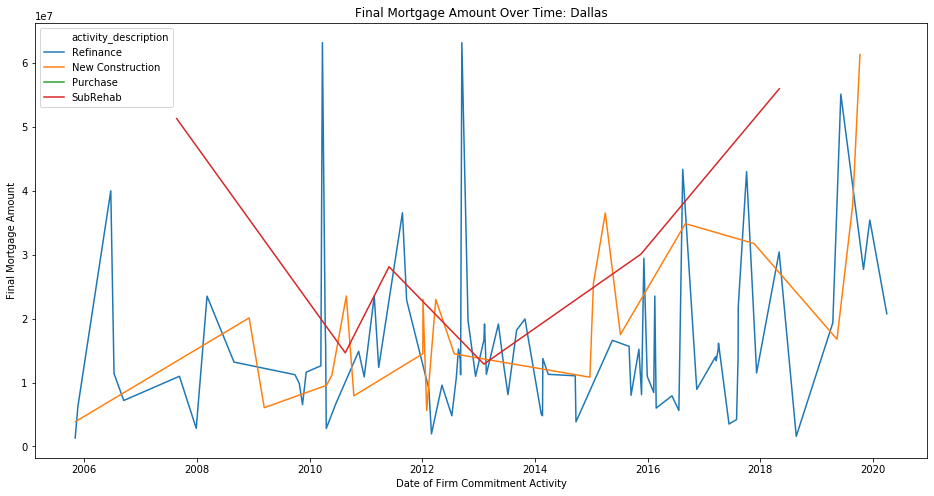

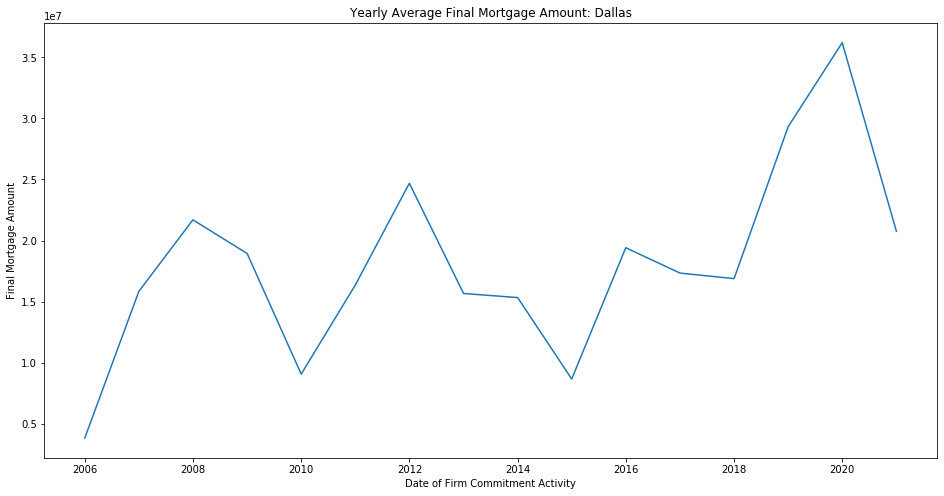

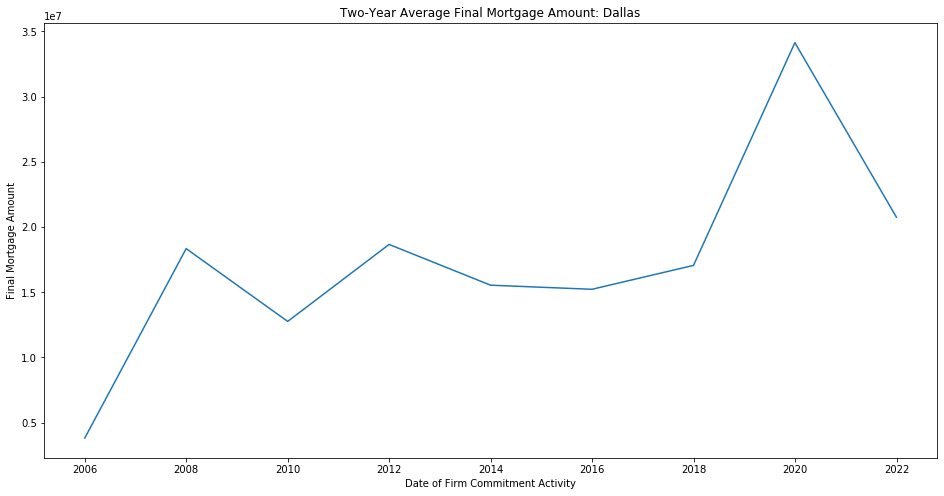

In [36]:
# clifton's time machine markets
threshold_cities = ["Houston", "Seattle", "Dallas"]

# loop through 
for city in threshold_cities:
    # subset for city
    date_index_df = df[df.project_city == city].sort_values(
        "date_of_firm_commitment_activity"
    ).set_index("date_of_firm_commitment_activity")

    # sum of the final_mortgage_amount by date_of_firm_commitment_activity
    date_index_df = (
        date_index_df.groupby(["date_of_firm_commitment_activity", "activity_description"])[
            "final_mortgage_amount"
        ]
        .sum()
        .reset_index()
    )
    
    date_index_df.set_index("date_of_firm_commitment_activity", inplace=True)
    
    # plot
    sns.lineplot(data=date_index_df, x=date_index_df.index, y="final_mortgage_amount", hue="activity_description")
    plt.title(f"Final Mortgage Amount Over Time: {city}")
    plt.xlabel("Date of Firm Commitment Activity")
    plt.ylabel("Final Mortgage Amount")
    plt.show()
    
    yearly_avg = date_index_df.resample('Y').mean()
    sns.lineplot(data=yearly_avg, x=yearly_avg.index, y="final_mortgage_amount")
    plt.title(f"Yearly Average Final Mortgage Amount: {city}")
    plt.xlabel("Date of Firm Commitment Activity")
    plt.ylabel("Final Mortgage Amount")
    plt.show()
    
    two_year_avg = date_index_df.resample('2Y').mean()
    sns.lineplot(data=two_year_avg, x=two_year_avg.index, y="final_mortgage_amount")
    plt.title(f"Two-Year Average Final Mortgage Amount: {city}")
    plt.xlabel("Date of Firm Commitment Activity")
    plt.ylabel("Final Mortgage Amount")
    plt.show()

**Takeaway**: What I observe in the charts above is that for the years that Clifton would have liked to enter into a market, the total final mortgage production for that city droped to $10M or less. We need to know from Clifton which markets he know's it's too late to target to derive a more general metric for labeling markets.

### Hypothesis Testing

$H_0$: The mean final mortgage amount is the same across all activity descriptions

$H_a$: The mean final mortgage amount is the same across all activity descriptions

In [37]:
df.activity_description.value_counts()

Refinance           16129
New Construction     2479
SubRehab             1429
Purchase              599
Additions             149
Improvements          119
Operating Loss         13
Name: activity_description, dtype: int64

In [50]:
# 99% confidence level
alpha = .01

refi = df[df.activity_description == "Refinance"].final_mortgage_amount
nc = df[df.activity_description == "New Construction"].final_mortgage_amount
sr = df[df.activity_description == "SubRehab"].final_mortgage_amount
purch = df[df.activity_description == "Purchase"].final_mortgage_amount
add = df[df.activity_description == "Additions"].final_mortgage_amount
imp = df[df.activity_description == "Improvements"].final_mortgage_amount
ol = df[df.activity_description == "Operating Loss"].final_mortgage_amount

stat, pvalue = stats.f_oneway(refi, nc, sr, purch, add, imp, ol)

print(f"statistic = {stat}")
print(f"  p-value = {pvalue}")
print()
if pvalue < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

statistic = 196.84680942974384
  p-value = 5.109521483305493e-245

Reject null hypothesis


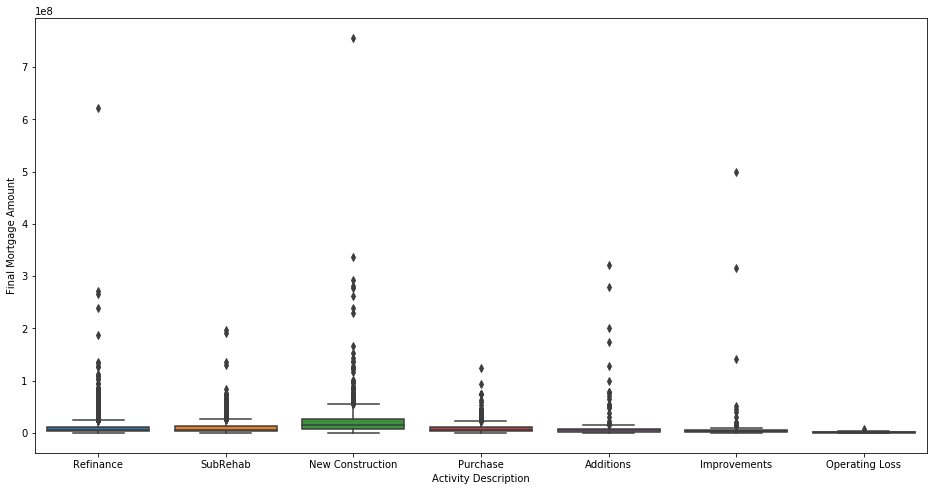

In [52]:
plt.figure(figsize=(16, 8))

sns.boxplot(data=df, x="activity_description", y="final_mortgage_amount")
plt.xlabel("Activity Description")
plt.ylabel("Final Mortgage Amount")
plt.show()

**Takeaways**: Looks like there are a lot of outliers that are skewing the data. However, we can clearly see that the new construction mortgages have the highest mean among the population.

$H_0$: The mean final mortgage amount is the same across all facility types

$H_a$: The mean final mortgage is different depending on the facility type

---

In [69]:
pd.DataFrame(df.groupby(["project_city", "fiscal_year_of_firm_commitment"])["final_mortgage_amount"].sum().sort_values(ascending=False).head(50))

final_mortgage_amount
project_city             fiscal_year_of_firm_commitment                       
Bronx                    2013                                        822430600
Trenton                  2009                                        760934400
New York                 2013                                        647062504
Chicago                  2012                                        520309300
                         2011                                        494045600
                         2013                                        491463400
Columbus                 2011                                        454701500
Boston                   2017                                        446376051
New York                 2017                                        419831700
                         2019                                        391100000
Long Island City, Queens 2019                                        386525000
New York                 2018                                        377496000
Charleston               2016                                        372911700
Queens                   2020                                        361055000
New York                 2015                                        342173300
Cumberland               2006                                        341358700
Chicago                  2018                                        334143600
Albany                   2010                                        321698800
San Antonio              2019                                        314846400
Washington               2016                                        312836100
Indianapolis             2010                                        309658000
New York                 2012                                        308894000
Bronx                    2019                                        305052400
Austin                   2018                                        304965500
Indianapolis             2012                                        296223600
New York                 2007                                        293866900
East Norriton            2010                                        292500000
Indianapolis             2013                                        288707000
Boston                   2018                                        286682950
Los Angeles              2018                                        283475200
Rochester                2010                                        282365700
Arcadia                  2008                                        280738200
                         2016                                        276563900
Austin                   2013                                        276402300
Corinth                  2017                                        268954900
Terre Haute              2016                                        266600300
Baltimore                2018                                        265487000
Chicago                  2017                                        263857095
Charlotte                2018                                        248437000
Houston                  2018                                        246005100
Boston                   2012                                        245583500
Houston                  2017                                        245001400
Los Angeles              2015                                        242304100
Waco                     2006                                        241760100
Boston                   2016                                        240160700
Washington               2011                                        236465800
Chicago                  2019                                        234729923
Indianapolis             2011                                        230783900
Washington               2010                                        227156000
Brooklyn                 202

In [71]:
df.project_city.unique()

array(['Olney', 'Breckenridge', 'Rocky River', ..., 'DUBLIN', 'Farragut',
       'PONTIAC'], dtype=object)

In [73]:
# df["project_city"] = df.project_city.str.strip()

In [ ]:
# def standardize_city_name(date):
#     return re.sub(r"(\d{2})/(\d{2})/(\d{2})", r"20\3-\1-\2", date)

In [ ]:
# regex = br""

# df["project_city"] = df.project_city.str.replace()

In [ ]:
# (^[a-z]+)(.)([a-z]+)

In [ ]:
# (^[A-Z][a-z]+)(\s?)([A-Z][a-z]+)

In [61]:
df.groupby(["project_city", "fiscal_year_of_firm_commitment"])["final_mortgage_amount"].sum()

project_city     fiscal_year_of_firm_commitment
 Corpus Christi  2012                               6149600
 Redwood City    2019                               5700000
ADRIAN           2010                               1912500
                 2019                               1151310
AKRON            2019                               6250000
                                                     ...   
tulsa            2012                              13366000
washington       2010                               3824000
winchester       2014                               1750000
woodbridge       2018                              21603700
worcester        2006                               2260200
Name: final_mortgage_amount, Length: 12610, dtype: int64

In [70]:
# number of unique cities before project_city string transformations
len(df.project_city.unique())

4383

In [74]:
df.groupby(["project_city", "fiscal_year_of_firm_commitment"])["final_mortgage_amount"].sum()

project_city  fiscal_year_of_firm_commitment
ADRIAN        2010                               1912500
              2019                               1151310
AKRON         2019                               6250000
ALEXANDRIA    2014                               6500000
ANGOLA        2019                               9760000
                                                  ...   
tulsa         2012                              13366000
washington    2010                               3824000
winchester    2014                               1750000
woodbridge    2018                              21603700
worcester     2006                               2260200
Name: final_mortgage_amount, Length: 12609, dtype: int64

In [76]:
# number of unique cities after project_city .strip()
len(df.project_city.unique())

4381

In [77]:
df["project_city"] = df.project_city.str.title()

In [78]:
df.groupby(["project_city", "fiscal_year_of_firm_commitment"])["final_mortgage_amount"].sum()

project_city  fiscal_year_of_firm_commitment
Abbeville     2008                               1552900
              2013                               6500000
Aberdeen      2006                               6828000
              2007                               4658000
              2013                              39936800
                                                  ...   
Zion          2020                               8293200
Zionsville    2012                              11000000
              2014                              25323200
              2015                               5500000
Zumbroda      2012                                788700
Name: final_mortgage_amount, Length: 12498, dtype: int64

In [79]:
# number of unique cities after project_city .title() case
len(df.project_city.unique())

4187